# How to make plots

In this notebook I will show how to load various plots and statistics

In [1]:
import hera_stats as hs
import hera_pspec as hp
import numpy as np
import matplotlib.pyplot as plt

/users/drocha/Python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pc = hp.container.PSpecContainer("../hera_stats/data/onsim.jackknife.spl_ants.Nj20.2018-06-26.17_53_12")

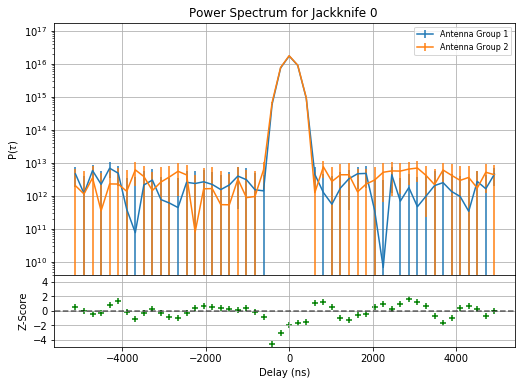

In [3]:
# To load a plot, just pass it pc and some parameters
hs.plots.plot_spectra(pc, n=0)

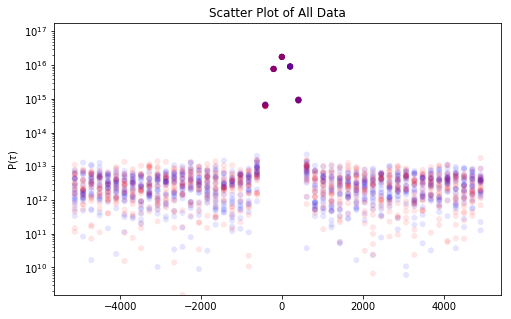

In [4]:
# We can also do a scatter plot of all groups
hs.plots.scatter(pc)

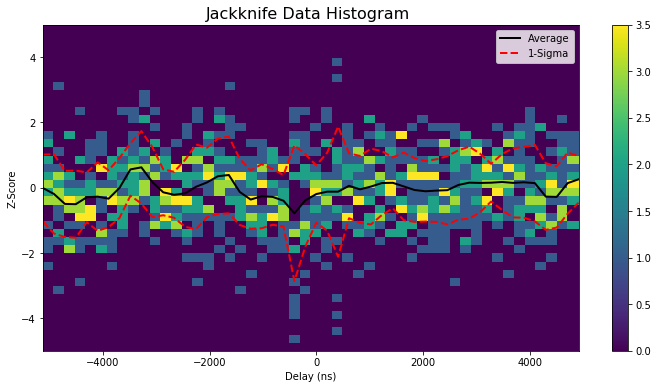

In [5]:
# Or a 2d histogram
hs.plots.hist_2d(pc)

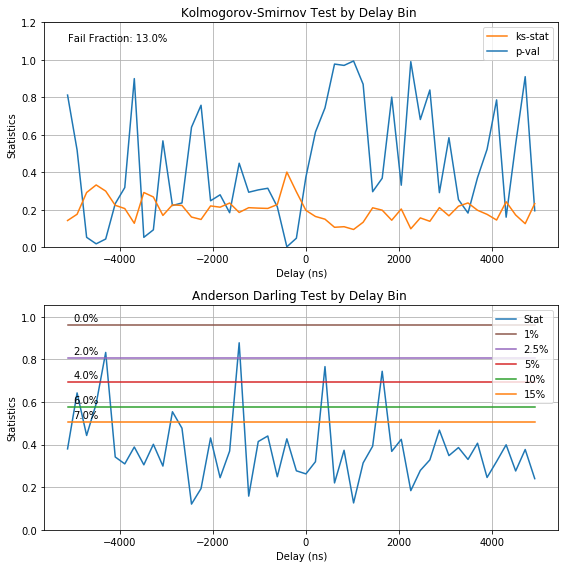

In [6]:
# Or we can plot a couple stats
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(211)
hs.plots.plot_kstest(pc, ax=ax)

ax2 = f.add_subplot(212)
hs.plots.plot_anderson(pc, ax=ax2)
f.tight_layout()

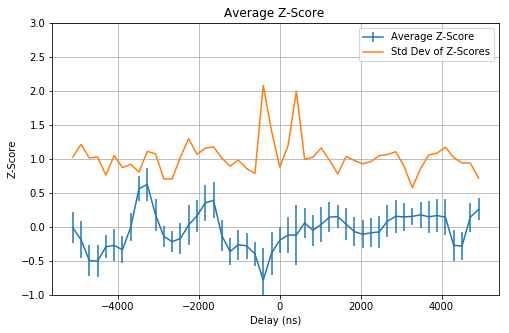

In [7]:
# We can also look at a the statistics of zscores.
hs.plots.plot_zscore_stats(pc)

There's plenty to look at! Now, to look at some statistics. We can do kstest, anderson test, or summarize a specific antenna.

In [8]:
# kstest tells us which delay modes pass or fail, and the total
# fraction that failed.
hs.stats.kstest(pc, verbose=True)

-5120 pass
-4915 pass
-4710 fail
-4505 fail
-4300 fail
-4096 pass
-3891 pass
-3686 pass
-3481 fail
-3276 fail
-3072 pass
-2867 fail
-2662 pass
-2457 pass
-2252 pass
-2048 pass
-1843 pass
-1638 fail
-1433 pass
-1228 pass
-1024 pass
-819 pass
-614 fail
-409 fail
-204 fail
0 pass
204 pass
409 pass
614 pass
819 pass
1024 pass
1228 pass
1433 pass
1638 pass
1843 pass
2048 pass
2252 pass
2457 pass
2662 pass
2867 pass
3072 pass
3276 pass
3481 fail
3686 pass
3891 pass
4096 pass
4300 fail
4505 pass
4710 pass
4915 fail


0.26

In [9]:
# Anderson Darling test can tell us if the distribution looks normal. For a
# perfect normal distribution, the failure rate should match the significance
# level.
hs.stats.anderson(pc, verbose=True)

Samples: 50
Significance level: 15.0 	Observed Failure Rate: 14.0
Significance level: 10.0 	Observed Failure Rate: 12.0
Significance level: 5.0 	Observed Failure Rate: 8.0
Significance level: 2.5 	Observed Failure Rate: 4.0
Significance level: 1.0 	Observed Failure Rate: 0.0


([15.0, 10.0, 5.0, 2.5, 1.0], [14.000000000000002, 12.0, 8.0, 4.0, 0.0])

There are more things one can specify for each test. For instance, one can look at only the imaginary part of the data by using the proj keyword argument:

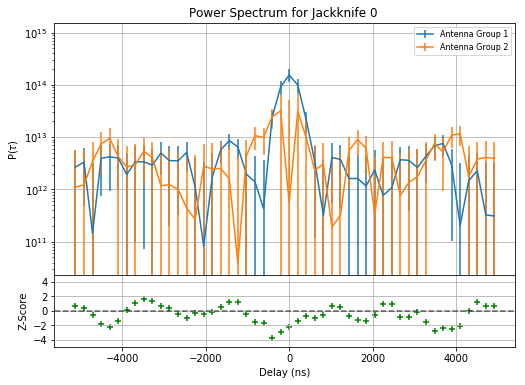

In [10]:
proj = lambda x: x.imag
hs.plots.plot_spectra(pc, n=0, proj=proj)

Or one can look at the difference between groups that contain antenna number 1 and groups that do not:

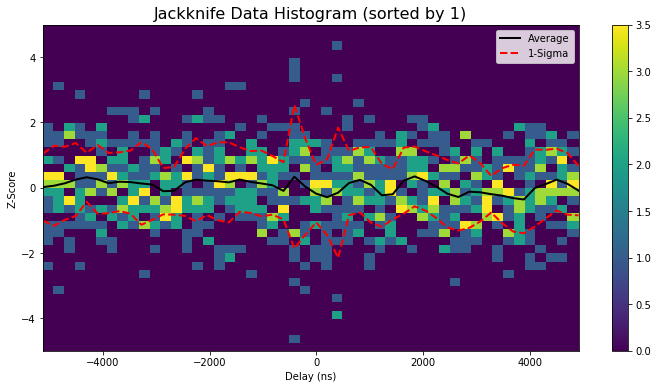

In [11]:
hs.plots.hist_2d(pc, sortby=1)

Thus concludes the overview of plots